In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_q1_2021 = "/Users/alexis/Desktop/Uni/2_COMP6200/Group Project/Files/Issue-136-Sales-tables-March-2021-quarter.xlsx"

# Read the two sheets into two separate dataframes
q1_2021post = pd.read_excel(file_q1_2021, sheet_name="Postcode", na_values='-')
q1_2021lga = pd.read_excel(file_q1_2021, sheet_name="LGA", na_values='-')

# Note:
# Sale prices in any geographical area where the number of sales is 10 or less were not shown for confidentiality
# They were represented as '-' in the table

In [3]:
# Rename column for easier referencing (postcode)

rename_cols= {'Postcode':'postcode', 
             'Dwelling Type':'dwelling_type', 
             "First Quartile Sales Price\n$'000s" : '25%_price',
             "Median Sales Price\n$'000s" : '50%_price', 
             "Third Quartile Sales Price\n'000s" : "75%_price",
             "Mean Sales Price\n$'000s" : 'mean_price',
             'Sales\nNo.':'sales_number'}

q1_2021post.rename(columns=rename_cols,
                   inplace=True)

q1_2021post.head(1)

,postcode,dwelling_type,25%_price,50%_price,75%_price,mean_price,sales_number,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,2000,Total,924.0,1371.0,3500.0,2794.0,184,0.1425,0.0711,0.0888,0.5862


In [4]:
# Drop na
q1_2021post = q1_2021post[q1_2021post['sales_number'].notna()]

# Check data type and df shape
print(q1_2021post.dtypes)
print(q1_2021post.shape)

postcode                     int64
dwelling_type               object
25%_price                  float64
50%_price                  float64
75%_price                  float64
mean_price                 float64
sales_number                object
Qtly change in Median      float64
Annual change in Median    float64
Qtly change in Count       float64
Annual change in Count     float64
dtype: object
(1111, 11)


Sales number was read into the dataframe as string because accordingly to the Explanatory note "statistics calculated from sample sizes between 10 and 30 are shown by an ‘s’ in the relevant table.  We suggest these data are treated with caution, particularly when assessing quarterly and annual changes."

In [5]:
# Check the number of 's' in 'sales_number'
q1_2021post[q1_2021post['sales_number'] == 's'].shape[0]

398

In [6]:
# Replace 's' with the median of 10 and 30 since there're quite a few
q1_2021post.loc[q1_2021post['sales_number'] == 's', 'sales_number'] = 20.0

# Cast type as float
q1_2021post['sales_number'] = q1_2021post['sales_number'].astype(float)

In [7]:
q1_2021post.describe().round(2)

,postcode,25%_price,50%_price,75%_price,mean_price,sales_number,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
count,1111.00,1111.00,1111.00,1111.00,1111.00,1111.00,1111.00,1106.00,1111.00,1106.00
mean,2340.06,786.08,965.06,1221.18,1047.83,64.69,0.06,0.13,-0.03,0.62
std,246.40,566.09,706.56,948.62,791.96,60.61,0.14,0.20,0.41,0.85
min,2000.00,88.00,120.00,147.00,125.00,20.00,-0.90,-0.46,-0.59,-0.49
25%,2130.50,452.50,540.00,650.00,574.50,20.00,-0.01,0.03,-0.22,0.17
50%,2284.00,652.00,770.00,907.00,804.00,43.00,0.05,0.11,-0.10,0.41
75%,2533.50,924.00,1188.00,1499.00,1257.00,82.50,0.12,0.20,0.06,0.74
max,2880.00,5375.00,6400.00,9000.00,7374.00,397.00,0.78,2.04,6.50,7.00


In [9]:
q1_2021post['postcode'].nunique()

446

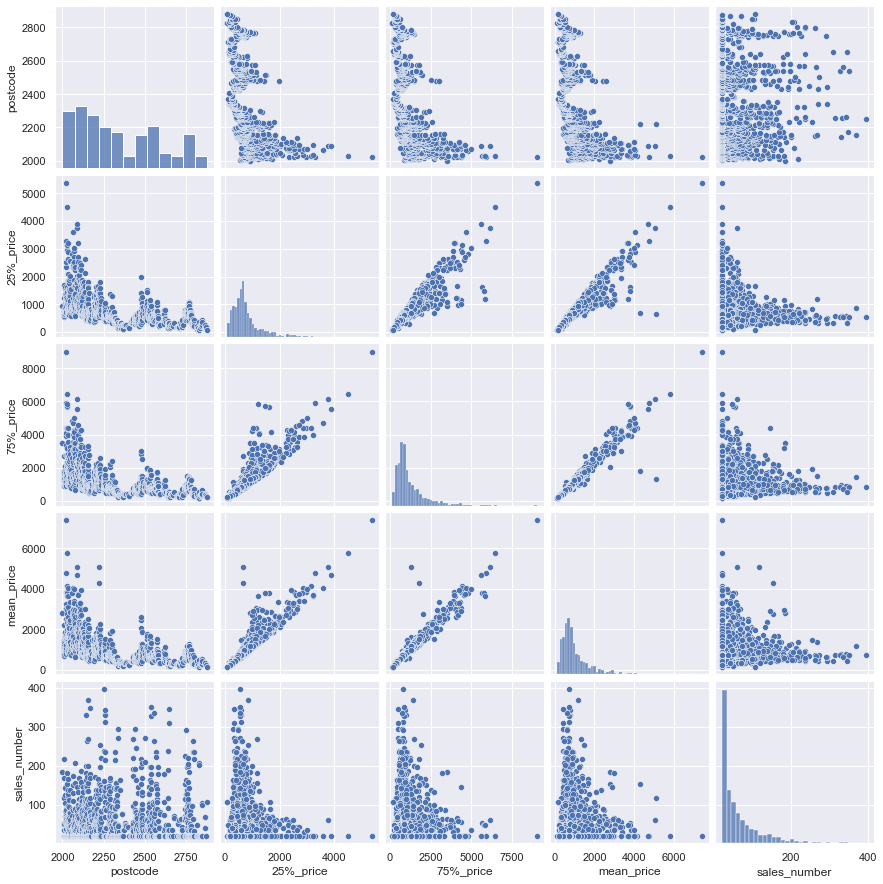

In [12]:
import seaborn as sns
sns.set_theme()

pair_cols = q1_2021post[['postcode', '25%_price', '75%_price', 'mean_price', 'sales_number']]

sns.pairplot(pair_cols)

In [ ]:
# WORRY ABOUT THIS LATER

#Rename column for easier referencing (LGA)

rename_cols= {'Greater Metropolitan Region (GMR)':'GMR',
              'Postcode':'postcode', 
              'DwellingType':'dwelling_type',
              'Local Government Area (LGA)':'LGA',
              'Dwelling Type':'dwelling_type', 
              "First Quartile Sales Price\n$'000s" : '25%_price',
              "Median Sales Price\n$'000s" : '50%_price', 
              "Third Quartile Sales Price\n'000s" : "75%_price",
              "Mean Sales Price\n$'000s" : 'mean_price',
              'Sales\nNo.':'sales_number'}

q1_2021lga.rename(columns=rename_cols,
                  inplace=True)

q1_2021lga.head(1)